# Advanced Python Programming Assignment - 2

### Q1 : Create a Gui programming for calculator using Pyqt

In [2]:
import sys
# import required modules such as QApplication from PyQt6 widgets
from PyQt6.QtWidgets import QApplication, QLabel, QWidget

In [3]:
# create application
app = QApplication([])  # parameter can be sys.argv

In [4]:
# create application's GUI
window = QWidget()
window.setWindowTitle("Hello, World!")
window.setGeometry(100, 100, 280, 80)

msg = QLabel("<h1>Hello, world!</h1>", parent = window)
msg.move(60, 15)

In [ ]:
# show window
window.show()

# add an exit
sys.exit(app.exec())

### Q2 : 2.	Load  cars dataset and divide the dataset using scikit learn. Plot the histograms and do the regression analysis

In [7]:
from pandas                  import read_csv, get_dummies, concat
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import accuracy_score
from matplotlib              import pyplot as plt

In [8]:
df = read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
fuel_types = get_dummies(df['Fuel_Type'])
seller_types = get_dummies(df['Seller_Type'])
transmission_types = get_dummies(df['Transmission'])

df = df.drop(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], axis = 1)
df = concat([df, fuel_types, seller_types, transmission_types], axis = 1)

In [11]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,CNG,Diesel,Petrol,Dealer,Individual,Automatic,Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,1,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,0,1,1,0,0,1
298,2009,3.35,11.00,87934,0,0,0,1,1,0,0,1
299,2017,11.50,12.50,9000,0,0,1,0,1,0,0,1


In [12]:
y = df['Selling_Price']
X = df.drop('Selling_Price', axis = 1)

In [13]:
X = StandardScaler().fit_transform(X)

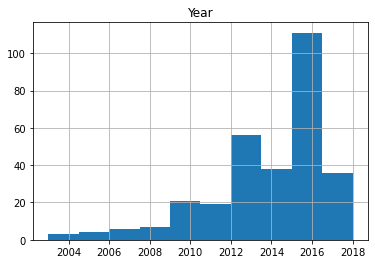

In [14]:
df.hist('Year')
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 103)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
print("model score :",model.score(X_test, y_test))

model score : 0.905222409883126
